## Random Forest model for PCOS Dataset (cleaned data)

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter
from imblearn.over_sampling import SMOTENC
from sklearn.feature_selection import RFE, RFECV
from sklearn.preprocessing import StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, auc, roc_curve, recall_score, f1_score, precision_score

# Sets a random seed to ensure reproducible results

In [2]:
seed_value= 0

# 1. Set the `PYTHONHASHSEED` environment variable at a fixed value
import os
os.environ['PYTHONHASHSEED']=str(seed_value)

# 2. Set the `python` built-in pseudo-random generator at a fixed value
import random
random.seed(seed_value)

# 3. Set the `numpy` pseudo-random generator at a fixed value
np.random.seed(seed_value)

# for later versions: 
# tf.compat.v1.set_random_seed(seed_value)

# 5. Configure a new global `tensorflow` session
"""
from keras import backend as K
session_conf = tf.compat.v1.ConfigProto(intra_op_parallelism_threads=1, inter_op_parallelism_threads=1)
sess = tf.compat.v1.Session(graph=tf.compat.v1.get_default_graph(), config=session_conf)
tf.compat.v1.keras.backend.set_session(sess)"
"""

'\nfrom keras import backend as K\nsession_conf = tf.compat.v1.ConfigProto(intra_op_parallelism_threads=1, inter_op_parallelism_threads=1)\nsess = tf.compat.v1.Session(graph=tf.compat.v1.get_default_graph(), config=session_conf)\ntf.compat.v1.keras.backend.set_session(sess)"\n'

### Import Dataset

In [3]:
X_train = pd.read_csv("../Data/X_train_final.csv")
y_train = pd.read_csv("../Data/y_train_final.csv")
X_test = pd.read_csv("../Data/X_test_final.csv")
y_test = pd.read_csv("../Data/y_test_final.csv")
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)
X_train

(572, 57)
(106, 57)
(572, 1)
(106, 1)


,Age (yrs),BMI,Pulse rate(bpm),Menstrual Cycle Length(days),Marriage Status (Yrs),Pregnant(Y/N),No. of abortions,I beta-HCG(mIU/mL),II beta-HCG(mIU/mL),FSH/LH,...,Vit D3 (ng/mL)_high,Vit D3 (ng/mL)_low,Vit D3 (ng/mL)_normal,PRG(ng/mL)_low,RBS(mg/dl)_high,RBS(mg/dl)_normal,I beta-HCG cat_abnormal,I beta-HCG cat_normal,II beta-HCG cat_abnormal,II beta-HCG cat_normal
0,1.212838,1.138042,1.784158,-1.974369,1.714235,1,1.032154,-0.155302,-0.062256,-0.052340,...,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0
1,1.212838,-0.738207,-0.519094,0.007810,1.303924,0,-0.413545,-0.194309,-0.147713,-0.059495,...,0.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0
2,0.670140,-0.713840,-0.519094,0.668536,1.098769,1,-0.413545,0.542465,0.300274,-0.095708,...,0.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0
3,-0.415256,-1.152443,2.551909,0.007810,-1.157939,1,-0.413545,2.727182,-0.076965,-0.067672,...,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0
4,1.031939,1.138042,2.551909,0.007810,1.303924,0,-0.413545,-0.194309,-0.147713,-0.072053,...,0.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
567,-1.191281,0.794340,1.784158,0.007810,-0.835833,1,-0.413545,-0.194309,-0.147713,0.020348,...,0.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0
568,-1.558498,0.054061,0.248657,-1.845955,-0.853103,0,-0.413545,-0.194309,-0.147713,-0.060024,...,0.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0
569,-0.665800,-0.164731,2.375315,-1.211244,-0.542473,0,-0.413545,-0.143145,-0.035624,-0.096597,...,0.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0
570,0.319137,2.212497,1.784158,1.329262,-0.323034,1,-0.413545,-0.058615,-0.137401,-0.043433,...,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0


### Building Random Forest Classifier

In [4]:
rf = RandomForestClassifier(n_estimators=100, random_state=42, n_jobs=-1)
rf.fit(X_train, y_train)
y_pred=rf.predict(X_test)
print("Test Accuracy:", accuracy_score(y_pred, y_test))

c:\Users\Stacy\anaconda\envs\dsa4262_pcos\Lib\site-packages\sklearn\base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


Test Accuracy: 0.8773584905660378


### Hyperparameter Tuning

In [5]:
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}
grid_search = GridSearchCV(rf, param_grid, cv=5, scoring='roc_auc', n_jobs=-1, verbose=1)
grid_search.fit(X_train, y_train)

print("Best Parameters:", grid_search.best_params_)
print("Best Cross-Validation ROC AUC:", grid_search.best_score_)

rf_best = grid_search.best_estimator_

Fitting 5 folds for each of 108 candidates, totalling 540 fits


c:\Users\Stacy\anaconda\envs\dsa4262_pcos\Lib\site-packages\sklearn\base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


Best Parameters: {'max_depth': 10, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 200}
Best Cross-Validation ROC AUC: 0.9808110718417339


### Model Evaluation

AUC score:  0.9754901960784315
New Model Test Accuracy: 0.9056603773584906


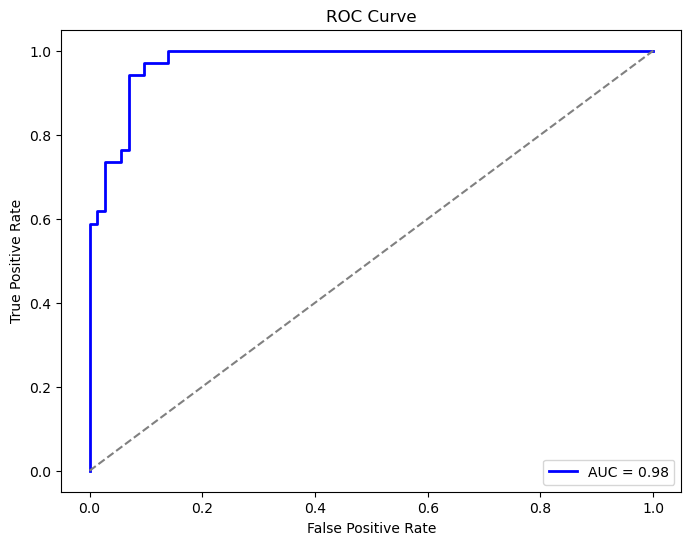

In [6]:
y_pred_best = rf_best.predict(X_test)
y_probs = rf_best.predict_proba(X_test)[:,1]
fpr, tpr, thresholds = roc_curve(y_test, y_probs)
roc_auc = auc(fpr, tpr)

print("AUC score: ", roc_auc)
print("New Model Test Accuracy:", accuracy_score(y_test, y_pred_best))

plt.figure(figsize=(8,6))
plt.plot(fpr, tpr, color='blue', lw=2, label=f"AUC = {roc_auc:.2f}")
plt.plot([0,1], [0,1], color='gray', linestyle="--")
plt.title("ROC Curve")
plt.legend(loc='lower right')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.show()

### Finding Best Threshold & Model Evaluation

Best threshold: 0.48
Accuracy:  0.9339622641509434
Precision:  0.8648648648648649
Recall/Sensitivity:  0.9411764705882353
F1 Score:  0.9014084507042254
Specificity:  0.9305555555555556


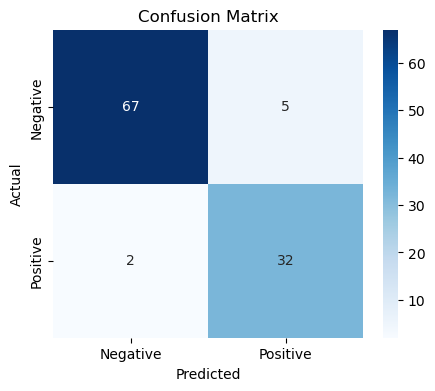

In [7]:
distances = np.sqrt((1 - tpr) ** 2 + fpr ** 2)
best_thresh = thresholds[np.argmin(distances)]
print(f"Best threshold: {best_thresh}")

y_pred_best = [1 if prob >= best_thresh else 0 for prob in y_probs]
print("Accuracy: ", accuracy_score(y_test, y_pred_best))
print("Precision: ", precision_score(y_test, y_pred_best))
print("Recall/Sensitivity: ", recall_score(y_test, y_pred_best))
print("F1 Score: ", f1_score(y_test, y_pred_best))
print("Specificity: ", recall_score(y_test, y_pred_best, pos_label=0))

cm = confusion_matrix(y_test, y_pred_best)
labels = ["True Negatives", "False Positives", "False Negatives", "True Positives"]
plt.figure(figsize=(5, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=["Negative", "Positive"], yticklabels=["Negative", "Positive"])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()